<a href="https://colab.research.google.com/github/andreacharlota/Explore-Covid-Data-Analysis/blob/main/Covid_Data_Analysis_Exploration_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data from covid Python Library https://ahmednafies.github.io/covid/ (with modification)

In [ ]:
import pandas as pd

# **Connect To Google Drive**

In [ ]:
# Mengakses google drive melalui google colaboratory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Inisiasi direktori tempat data disimpan
path = "/content/gdrive/MyDrive/csv/" 
# Cek isi direktori
import os
os.listdir(path)

['covid.csv']

In [ ]:
# Load data
df = pd.read_csv(path + 'covid.csv')

# **1. Explore the Data COVID-19 Data**



In [ ]:
# Menampilkan 10 data teratas
df.head(10)

,country,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
0,0,721,721,0.0,15,0.0,706.0,0.0,0.0,0.0,0,0,0,0,0
1,USA,44518437,44518437,NaN,719933,NaN,33938147.0,9860357.0,9860357.0,19236.0,644748656,0,133514,2159,333437210
2,India,33845586,33845586,11343.0,449214,185.0,33134292.0,262080.0,262080.0,8944.0,574252400,0,24227,322,1397013045
3,Brazil,21468121,21468121,NaN,597986,NaN,20442653.0,427482.0,427482.0,8318.0,63776166,0,100106,2788,214454297
4,UK,7900680,7900680,NaN,136953,NaN,6417660.0,1346067.0,1346067.0,815.0,304621001,0,115620,2004,68333332
5,Russia,7612317,7612317,25781.0,210801,883.0,6740491.0,661025.0,661025.0,2300.0,193700000,0,52135,1444,146012999
6,Turkey,7238267,7238267,NaN,64661,NaN,6686246.0,487360.0,487360.0,633.0,87366730,0,84681,756,85476611
7,France,7027059,7027059,NaN,116798,NaN,6790335.0,119926.0,119926.0,1355.0,143234831,0,107358,1784,65454753
8,Iran,5638735,5638735,14607.0,121347,238.0,5115796.0,401592.0,401592.0,5727.0,32619228,0,66074,1422,85340085
9,Argentina,5259738,5259738,NaN,115245,NaN,5123173.0,21320.0,21320.0,1052.0,24252818,0,115053,2521,45715732


In [ ]:
# Menampilkan nama-nama kolom datase covid.csv
df.columns

Index(['country', 'total_cases', 'confirmed', 'new_cases', 'deaths',
       'new_deaths', 'recovered', 'active', 'active_cases', 'critical',
       'total_tests', 'total_tests_per_million', 'total_cases_per_million',
       'total_deaths_per_million', 'population'],
      dtype='object')

In [ ]:
# Ukuran data
df.shape

(228, 15)

In [ ]:
# Statistika Deskriptif Data 
# Cek data kuantitatif/numerik
df.describe()

,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
count,2.280000e+02,2.280000e+02,80.000000,228.000000,61.000000,2.260000e+02,2.130000e+02,2.130000e+02,224.000000,2.280000e+02,228.0,228.000000,228.000000,2.280000e+02
mean,1.035492e+06,1.035492e+06,1716.187500,21153.513158,44.557377,9.346864e+05,8.462612e+04,8.462612e+04,388.281250,1.652120e+07,0.0,48520.666667,767.539474,3.474188e+07
std,4.110429e+06,4.110429e+06,3898.741242,75890.473742,120.901547,3.579155e+06,6.836320e+05,6.836320e+05,1638.695611,6.419098e+07,0.0,48659.256047,893.510432,1.379643e+08
min,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00
25%,1.189175e+04,1.189175e+04,50.500000,133.750000,2.000000,5.994500e+03,6.900000e+02,6.900000e+02,0.000000,1.750645e+05,0.0,4354.750000,56.500000,5.858055e+05
50%,9.428050e+04,9.428050e+04,308.000000,1346.000000,9.000000,7.838200e+04,6.204000e+03,6.204000e+03,11.000000,1.257692e+06,0.0,34171.000000,404.000000,6.217648e+06
75%,5.025200e+05,5.025200e+05,1490.500000,8695.500000,27.000000,4.437538e+05,2.777600e+04,2.777600e+04,168.500000,7.577564e+06,0.0,82963.750000,1251.750000,2.387087e+07
max,4.451844e+07,4.451844e+07,25781.000000,719933.000000,883.000000,3.393815e+07,9.860357e+06,9.860357e+06,19236.000000,6.447487e+08,0.0,215385.000000,5946.000000,1.439324e+09


> kolom total_tests_per_million bernilai 0

In [ ]:
# Cek data kualitatif/kategorik
df["country"].unique()

array(['0', 'USA', 'India', 'Brazil', 'UK', 'Russia', 'Turkey', 'France',
       'Iran', 'Argentina', 'Colombia', 'Spain', 'Italy', 'Germany',
       'Indonesia', 'Mexico', 'Poland', 'South Africa', 'Philippines',
       'Ukraine', 'Malaysia', 'Peru', 'Iraq', 'Netherlands', 'Japan',
       'Czechia', 'Chile', 'Thailand', 'Canada', 'Bangladesh', 'Israel',
       'Romania', 'Pakistan', 'Belgium', 'Sweden', 'Portugal', 'Serbia',
       'Morocco', 'Kazakhstan', 'Cuba', 'Switzerland', 'Jordan',
       'Hungary', 'Vietnam', 'Nepal', 'Austria', 'UAE', 'Tunisia',
       'Greece', 'Lebanon', 'Georgia', 'Guatemala', 'Saudi Arabia',
       'Belarus', 'Costa Rica', 'Sri Lanka', 'Ecuador', 'Bulgaria',
       'Bolivia', 'Azerbaijan', 'Myanmar', 'Panama', 'Paraguay',
       'Slovakia', 'Kuwait', 'Croatia', 'Palestine', 'Ireland', 'Uruguay',
       'Venezuela', 'Honduras', 'Dominican Republic', 'Denmark',
       'Ethiopia', 'Libya', 'Lithuania', 'S. Korea', 'Mongolia', 'Egypt',
       'Oman', 'Moldova

> Ada country "0"

In [ ]:
# Cek Tipe Data dan Missing Value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   228 non-null    object 
 1   total_cases               228 non-null    int64  
 2   confirmed                 228 non-null    int64  
 3   new_cases                 80 non-null     float64
 4   deaths                    228 non-null    int64  
 5   new_deaths                61 non-null     float64
 6   recovered                 226 non-null    float64
 7   active                    213 non-null    float64
 8   active_cases              213 non-null    float64
 9   critical                  224 non-null    float64
 10  total_tests               228 non-null    int64  
 11  total_tests_per_million   228 non-null    int64  
 12  total_cases_per_million   228 non-null    int64  
 13  total_deaths_per_million  228 non-null    int64  
 14  population

> ada missing value pada beberapa variabel

In [ ]:
# Mengidentifikasi duplikat data
df[df.duplicated(keep=False)].sort_values("country")

,country,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
108,Australia,113411,113411,2019.0,1346,12.0,82406.0,29659.0,29659.0,296.0,38591872,0,4384,52,25870692
227,Australia,113411,113411,2019.0,1346,12.0,82406.0,29659.0,29659.0,296.0,38591872,0,4384,52,25870692
175,Brunei,7904,7904,188.0,60,4.0,5501.0,2343.0,2343.0,32.0,374059,0,17853,136,442731
224,Brunei,7904,7904,188.0,60,4.0,5501.0,2343.0,2343.0,32.0,374059,0,17853,136,442731
107,Cambodia,113475,113475,219.0,2406,23.0,104865.0,6204.0,6204.0,0.0,2450556,0,6672,141,17008855
226,Cambodia,113475,113475,219.0,2406,23.0,104865.0,6204.0,6204.0,0.0,2450556,0,6672,141,17008855
155,Taiwan,16255,16255,5.0,844,1.0,15255.0,156.0,156.0,0.0,6472449,0,681,35,23870870
225,Taiwan,16255,16255,5.0,844,1.0,15255.0,156.0,156.0,0.0,6472449,0,681,35,23870870


> Terdapat duplikat data 

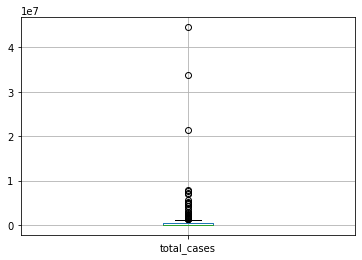

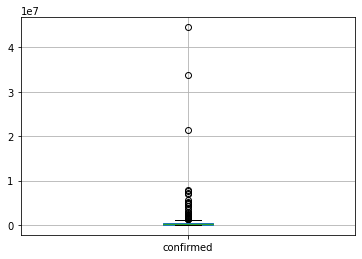

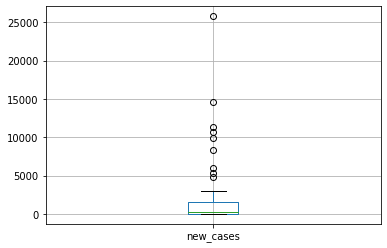

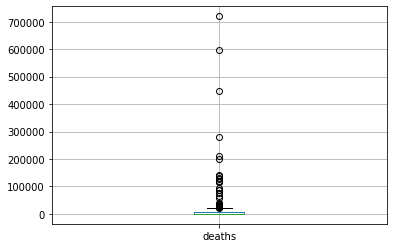

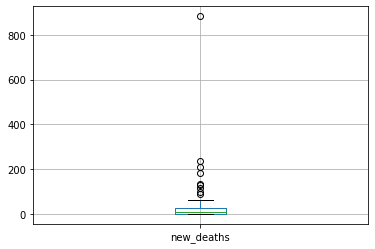

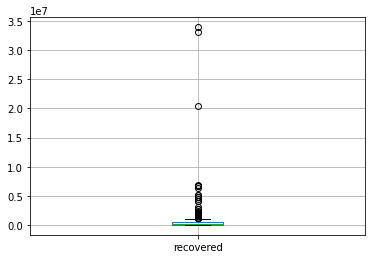

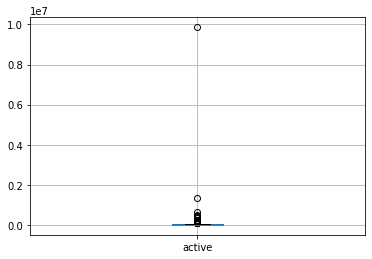

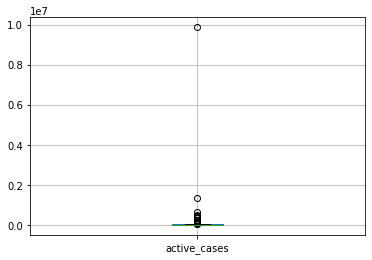

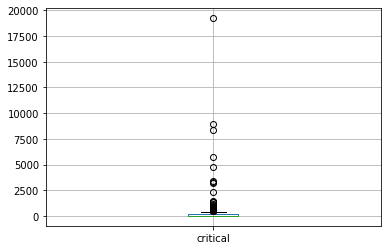

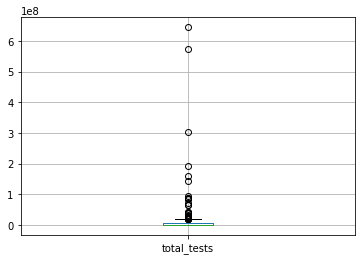

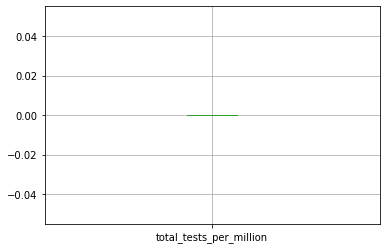

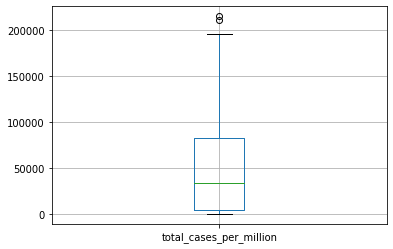

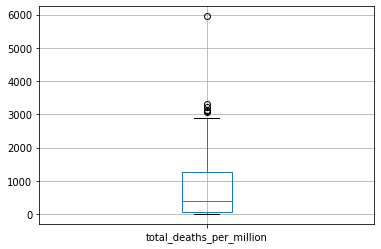

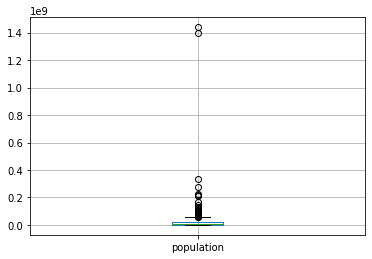

In [ ]:
# Cek outlier menggunakan boxplot
import matplotlib.pyplot as plt
df_numerik = df.drop(columns="country")
for column in df_numerik:
    plt.figure()
    df_numerik.boxplot([column])

> terdapat outlier pada semua variabel numerik

# **2. Data Cleaning**


**Handling Missing Value**

In [ ]:
# Menghitung jumlah missing values pada masing-masing kolom
jumlah_missing = pd.isnull(df).sum()
jumlah_missing

country                       0
total_cases                   0
confirmed                     0
new_cases                   148
deaths                        0
new_deaths                  167
recovered                     2
active                       15
active_cases                 15
critical                      4
total_tests                   0
total_tests_per_million       0
total_cases_per_million       0
total_deaths_per_million      0
population                    0
dtype: int64

In [ ]:
# menghitung ratio missing value
rasio = jumlah_missing.div(len(df))
rasio

country                     0.000000
total_cases                 0.000000
confirmed                   0.000000
new_cases                   0.649123
deaths                      0.000000
new_deaths                  0.732456
recovered                   0.008772
active                      0.065789
active_cases                0.065789
critical                    0.017544
total_tests                 0.000000
total_tests_per_million     0.000000
total_cases_per_million     0.000000
total_deaths_per_million    0.000000
population                  0.000000
dtype: float64

In [ ]:
# Imputasi Missing Value
# Diasumsikan data new_cases, new_deaths, recovered, active, active_cases, critical yang kosong memang bernilai 0
df[['new_cases', 'new_deaths', 'recovered', 'active', 'active_cases', 'critical']] = df[['new_cases', 'new_deaths', 'recovered', 'active', 'active_cases', 'critical']].fillna(0)

In [ ]:
pd.isnull(df).sum()

country                     0
total_cases                 0
confirmed                   0
new_cases                   0
deaths                      0
new_deaths                  0
recovered                   0
active                      0
active_cases                0
critical                    0
total_tests                 0
total_tests_per_million     0
total_cases_per_million     0
total_deaths_per_million    0
population                  0
dtype: int64

In [ ]:
df.head()

,country,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
0,0,721,721,0.0,15,0.0,706.0,0.0,0.0,0.0,0,0,0,0,0
1,USA,44518437,44518437,0.0,719933,0.0,33938147.0,9860357.0,9860357.0,19236.0,644748656,0,133514,2159,333437210
2,India,33845586,33845586,11343.0,449214,185.0,33134292.0,262080.0,262080.0,8944.0,574252400,0,24227,322,1397013045
3,Brazil,21468121,21468121,0.0,597986,0.0,20442653.0,427482.0,427482.0,8318.0,63776166,0,100106,2788,214454297
4,UK,7900680,7900680,0.0,136953,0.0,6417660.0,1346067.0,1346067.0,815.0,304621001,0,115620,2004,68333332


**Handling Data Duplicate**

In [ ]:
# Menghapus Duplikat Data
# menghilangkan duplicate value pada tabel
df = df.drop_duplicates().reset_index(drop=True)
df

,country,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
0,0,721,721,0.0,15,0.0,706.0,0.0,0.0,0.0,0,0,0,0,0
1,USA,44518437,44518437,0.0,719933,0.0,33938147.0,9860357.0,9860357.0,19236.0,644748656,0,133514,2159,333437210
2,India,33845586,33845586,11343.0,449214,185.0,33134292.0,262080.0,262080.0,8944.0,574252400,0,24227,322,1397013045
3,Brazil,21468121,21468121,0.0,597986,0.0,20442653.0,427482.0,427482.0,8318.0,63776166,0,100106,2788,214454297
4,UK,7900680,7900680,0.0,136953,0.0,6417660.0,1346067.0,1346067.0,815.0,304621001,0,115620,2004,68333332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Marshall Islands,4,4,0.0,0,0.0,4.0,0.0,0.0,0.0,0,0,67,0,59691
220,Samoa,3,3,0.0,0,0.0,3.0,0.0,0.0,0.0,0,0,15,0,200068
221,Saint Helena,2,2,0.0,0,0.0,2.0,0.0,0.0,0.0,0,0,328,0,6100
222,Micronesia,1,1,0.0,0,0.0,1.0,0.0,0.0,0.0,0,0,9,0,116534


In [ ]:
# Cek kembali apakah masih terdapat duplikat data
df[df.duplicated(keep=False)].sort_values("country")

,country,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population


In [ ]:
# menstandardisasi data
df_std = df.copy()
df_std['total_cases'] = (df_std["total_cases"] - df_std["total_cases"].mean()) / (df_std["total_cases"].std())
df_std.head()

,country,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
0,0,-0.253831,721,0.0,15,0.0,706.0,0.0,0.0,0.0,0,0,0,0,0
1,USA,10.486163,44518437,0.0,719933,0.0,33938147.0,9860357.0,9860357.0,19236.0,644748656,0,133514,2159,333437210
2,India,7.911315,33845586,11343.0,449214,185.0,33134292.0,262080.0,262080.0,8944.0,574252400,0,24227,322,1397013045
3,Brazil,4.925225,21468121,0.0,597986,0.0,20442653.0,427482.0,427482.0,8318.0,63776166,0,100106,2788,214454297
4,UK,1.652051,7900680,0.0,136953,0.0,6417660.0,1346067.0,1346067.0,815.0,304621001,0,115620,2004,68333332


In [ ]:
# menstandardisasi data menggunakan StandardScaler
df_std = df.copy()
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
df_std = scale.fit_transform(df_numerik) 
df_std = pd.DataFrame(df_std, columns=df_numerik.columns)
df_std.head()

,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
0,-0.252297,-0.252297,-0.442967,-0.279153,-0.371601,-0.261529,-0.124081,-0.124081,-0.237476,-0.257942,0.0,-0.999346,-0.860906,-0.252372
1,10.601964,10.601964,NaN,9.227996,NaN,9.241490,14.333383,14.333383,11.527419,9.808383,0.0,1.750547,1.560723,2.169782
2,7.999721,7.999721,2.484789,5.652914,1.171268,9.016398,0.260187,0.260187,5.232748,8.707740,0.0,-0.500359,-0.499736,9.895807
3,4.981861,4.981861,NaN,7.617579,NaN,5.462538,0.502703,0.502703,4.849881,0.737782,0.0,1.062467,2.266237,1.305467
4,1.673863,1.673863,NaN,1.529234,NaN,1.535319,1.849551,1.849551,0.260985,4.498042,0.0,1.381997,1.386868,0.244015


In [ ]:
# normalisasi data
df_norm = df.copy()
df_norm['total_cases'] = (df_norm["total_cases"] - df_norm["total_cases"].min()) / (df_norm["total_cases"].max() - df_norm["total_cases"].min())
df_norm.head()

,country,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
0,0,0.000016,721,0.0,15,0.0,706.0,0.0,0.0,0.0,0,0,0,0,0
1,USA,1.000000,44518437,0.0,719933,0.0,33938147.0,9860357.0,9860357.0,19236.0,644748656,0,133514,2159,333437210
2,India,0.760260,33845586,11343.0,449214,185.0,33134292.0,262080.0,262080.0,8944.0,574252400,0,24227,322,1397013045
3,Brazil,0.482230,21468121,0.0,597986,0.0,20442653.0,427482.0,427482.0,8318.0,63776166,0,100106,2788,214454297
4,UK,0.177470,7900680,0.0,136953,0.0,6417660.0,1346067.0,1346067.0,815.0,304621001,0,115620,2004,68333332


In [ ]:
# normalisasi data menggunakan MinMaxScaler
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
df_norm = min_max_scaler.fit_transform(df_numerik)
df_norm = pd.DataFrame(df_norm)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000016,0.000016,0.000000,0.000021,0.000000,0.000021,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,1.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.619885,0.363101,0.231662
2,0.760260,0.760260,0.439975,0.623966,0.209513,0.976314,0.026579,0.026579,0.464962,0.890661,0.0,0.112482,0.054154,0.970604
3,0.482230,0.482230,NaN,0.830613,NaN,0.602350,0.043354,0.043354,0.432418,0.098916,0.0,0.464777,0.468887,0.148997
4,0.177470,0.177470,NaN,0.190230,NaN,0.189099,0.136513,0.136513,0.042368,0.472465,0.0,0.536806,0.337033,0.047476


# **3. Data Manipulation**


**Check & Change Data Type**

In [ ]:
# Cek Tipe Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   224 non-null    object 
 1   total_cases               224 non-null    int64  
 2   confirmed                 224 non-null    int64  
 3   new_cases                 224 non-null    float64
 4   deaths                    224 non-null    int64  
 5   new_deaths                224 non-null    float64
 6   recovered                 224 non-null    float64
 7   active                    224 non-null    float64
 8   active_cases              224 non-null    float64
 9   critical                  224 non-null    float64
 10  total_tests               224 non-null    int64  
 11  total_tests_per_million   224 non-null    int64  
 12  total_cases_per_million   224 non-null    int64  
 13  total_deaths_per_million  224 non-null    int64  
 14  population

In [ ]:
# Ubah tipe data float menjadi integer untuk 1 kolom
df['new_cases'] = df['new_cases'].astype(int)
df['new_cases'].dtypes

dtype('int64')

In [ ]:
# Ubah tipe data float menjadi integer untuk >1 kolom
df = df.astype({'new_deaths': int, 'recovered': int, 'active': int, 'active_cases': int, 'critical': int})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   country                   224 non-null    object
 1   total_cases               224 non-null    int64 
 2   confirmed                 224 non-null    int64 
 3   new_cases                 224 non-null    int64 
 4   deaths                    224 non-null    int64 
 5   new_deaths                224 non-null    int64 
 6   recovered                 224 non-null    int64 
 7   active                    224 non-null    int64 
 8   active_cases              224 non-null    int64 
 9   critical                  224 non-null    int64 
 10  total_tests               224 non-null    int64 
 11  total_tests_per_million   224 non-null    int64 
 12  total_cases_per_million   224 non-null    int64 
 13  total_deaths_per_million  224 non-null    int64 
 14  population                

**Removing**

In [ ]:
# menghapus index 0
df.drop([0], axis=0, inplace=True)
df = df.reset_index(drop=True)
df.head()

,country,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
0,USA,44518437,44518437,0,719933,0,33938147,9860357,9860357,19236,644748656,0,133514,2159,333437210
1,India,33845586,33845586,11343,449214,185,33134292,262080,262080,8944,574252400,0,24227,322,1397013045
2,Brazil,21468121,21468121,0,597986,0,20442653,427482,427482,8318,63776166,0,100106,2788,214454297
3,UK,7900680,7900680,0,136953,0,6417660,1346067,1346067,815,304621001,0,115620,2004,68333332
4,Russia,7612317,7612317,25781,210801,883,6740491,661025,661025,2300,193700000,0,52135,1444,146012999


In [ ]:
# menghapus kolom total_tests_per_million
df.drop(['total_tests_per_million'], axis=1, inplace=True)
df.head()

,country,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_cases_per_million,total_deaths_per_million,population
0,USA,44518437,44518437,0,719933,0,33938147,9860357,9860357,19236,644748656,133514,2159,333437210
1,India,33845586,33845586,11343,449214,185,33134292,262080,262080,8944,574252400,24227,322,1397013045
2,Brazil,21468121,21468121,0,597986,0,20442653,427482,427482,8318,63776166,100106,2788,214454297
3,UK,7900680,7900680,0,136953,0,6417660,1346067,1346067,815,304621001,115620,2004,68333332
4,Russia,7612317,7612317,25781,210801,883,6740491,661025,661025,2300,193700000,52135,1444,146012999


**Renaming**

In [ ]:
df = df.rename(columns={"country": "Country", 
                        "total_cases": "Total Cases", 
                        "confirmed": "Confirmed",
                        "new_cases": "New Cases",
                        "deaths": "Deaths",
                        "new_deaths": "New Deaths",
                        "recovered": "Recovered",
                        "active": "Active",
                        "active_cases": "Active Cases",
                        "critical": "Critical",
                        "total_tests": "Total Tests",
                        "total_cases_per_million": "Total Cases Per Million",
                        "total_deaths_per_million": "Total Deaths Per Million",
                        "population": "Population"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country                   223 non-null    object
 1   Total Cases               223 non-null    int64 
 2   Confirmed                 223 non-null    int64 
 3   New Cases                 223 non-null    int64 
 4   Deaths                    223 non-null    int64 
 5   New Deaths                223 non-null    int64 
 6   Recovered                 223 non-null    int64 
 7   Active                    223 non-null    int64 
 8   Active Cases              223 non-null    int64 
 9   Critical                  223 non-null    int64 
 10  Total Tests               223 non-null    int64 
 11  Total Cases Per Million   223 non-null    int64 
 12  Total Deaths Per Million  223 non-null    int64 
 13  Population                223 non-null    int64 
dtypes: int64(13), object(1)
me

# **4. Data Wrangling**


**Transformation**

In [ ]:
# Contoh penerapan fungsi transformasi x/1000000 pada data population
df['Population (in Million)'] = df['Population'].transform(func = lambda x : x / 1000000)
df.head()

,Country,Total Cases,Confirmed,New Cases,Deaths,New Deaths,Recovered,Active,Active Cases,Critical,Total Tests,Total Cases Per Million,Total Deaths Per Million,Population,Population (in Million)
0,USA,44518437,44518437,0,719933,0,33938147,9860357,9860357,19236,644748656,133514,2159,333437210,333.437210
1,India,33845586,33845586,11343,449214,185,33134292,262080,262080,8944,574252400,24227,322,1397013045,1397.013045
2,Brazil,21468121,21468121,0,597986,0,20442653,427482,427482,8318,63776166,100106,2788,214454297,214.454297
3,UK,7900680,7900680,0,136953,0,6417660,1346067,1346067,815,304621001,115620,2004,68333332,68.333332
4,Russia,7612317,7612317,25781,210801,883,6740491,661025,661025,2300,193700000,52135,1444,146012999,146.012999


**Data Correlation**

In [ ]:
df.corr()

,Total Cases,Confirmed,New Cases,Deaths,New Deaths,Recovered,Active,Active Cases,Critical,Total Tests,Total Cases Per Million,Total Deaths Per Million,Population,Population (in Million)
Total Cases,1.000000,1.000000,0.280956,0.933044,0.228202,0.992091,0.757879,0.757879,0.918704,0.902031,0.155496,0.216488,0.524164,0.524164
Confirmed,1.000000,1.000000,0.280956,0.933044,0.228202,0.992091,0.757879,0.757879,0.918704,0.902031,0.155496,0.216488,0.524164,0.524164
New Cases,0.280956,0.280956,1.000000,0.287908,0.890291,0.307185,0.060950,0.060950,0.333191,0.313294,0.007729,0.061503,0.271121,0.271121
Deaths,0.933044,0.933044,0.287908,1.000000,0.299161,0.923186,0.678060,0.678060,0.895688,0.770080,0.151105,0.338181,0.446114,0.446114
New Deaths,0.228202,0.228202,0.890291,0.299161,1.000000,0.244596,0.068247,0.068247,0.247007,0.276041,-0.002411,0.096318,0.203498,0.203498
Recovered,0.992091,0.992091,0.307185,0.923186,0.244596,1.000000,0.674335,0.674335,0.888915,0.890403,0.149911,0.202894,0.562954,0.562954
Active,0.757879,0.757879,0.060950,0.678060,0.068247,0.674335,1.000000,1.000000,0.811906,0.719035,0.137118,0.136636,0.172768,0.172768
Active Cases,0.757879,0.757879,0.060950,0.678060,0.068247,0.674335,1.000000,1.000000,0.811906,0.719035,0.137118,0.136636,0.172768,0.172768
Critical,0.918704,0.918704,0.333191,0.895688,0.247007,0.888915,0.811906,0.811906,1.000000,0.780495,0.101104,0.182467,0.427044,0.427044
Total Tests,0.902031,0.902031,0.313294,0.770080,0.276041,0.890403,0.719035,0.719035,0.780495,1.000000,0.126337,0.136247,0.629428,0.629428


# **5. Exporting Data**


In [ ]:
# Export Data
df.to_csv(path + 'covid_clean.csv', index=False)

# **6. Summarize, Visualize Data, and gain insight**



In [ ]:
sorted = df.sort_values(by=['Confirmed'], ascending=False)
sorted

,Country,Total Cases,Confirmed,New Cases,Deaths,New Deaths,Recovered,Active,Active Cases,Critical,Total Tests,Total Cases Per Million,Total Deaths Per Million,Population,Population (in Million)
0,USA,44518437,44518437,0,719933,0,33938147,9860357,9860357,19236,644748656,133514,2159,333437210,333.437210
1,India,33845586,33845586,11343,449214,185,33134292,262080,262080,8944,574252400,24227,322,1397013045,1397.013045
2,Brazil,21468121,21468121,0,597986,0,20442653,427482,427482,8318,63776166,100106,2788,214454297,214.454297
3,UK,7900680,7900680,0,136953,0,6417660,1346067,1346067,815,304621001,115620,2004,68333332,68.333332
4,Russia,7612317,7612317,25781,210801,883,6740491,661025,661025,2300,193700000,52135,1444,146012999,146.012999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Vanuatu,4,4,0,1,0,3,0,0,0,23000,13,3,316123,0.316123
218,Marshall Islands,4,4,0,0,0,4,0,0,0,0,67,0,59691,0.059691
219,Samoa,3,3,0,0,0,3,0,0,0,0,15,0,200068,0.200068
220,Saint Helena,2,2,0,0,0,2,0,0,0,0,328,0,6100,0.006100


In [ ]:
included = sorted[~sorted.Country.isin(['Europe', 'South America', 'Asia', 'North America', 'Africa'])]

In [ ]:
top10 = included.head(10)
top10

,Country,Total Cases,Confirmed,New Cases,Deaths,New Deaths,Recovered,Active,Active Cases,Critical,Total Tests,Total Cases Per Million,Total Deaths Per Million,Population,Population (in Million)
0,USA,44518437,44518437,0,719933,0,33938147,9860357,9860357,19236,644748656,133514,2159,333437210,333.437210
1,India,33845586,33845586,11343,449214,185,33134292,262080,262080,8944,574252400,24227,322,1397013045,1397.013045
2,Brazil,21468121,21468121,0,597986,0,20442653,427482,427482,8318,63776166,100106,2788,214454297,214.454297
3,UK,7900680,7900680,0,136953,0,6417660,1346067,1346067,815,304621001,115620,2004,68333332,68.333332
4,Russia,7612317,7612317,25781,210801,883,6740491,661025,661025,2300,193700000,52135,1444,146012999,146.012999
5,Turkey,7238267,7238267,0,64661,0,6686246,487360,487360,633,87366730,84681,756,85476611,85.476611
6,France,7027059,7027059,0,116798,0,6790335,119926,119926,1355,143234831,107358,1784,65454753,65.454753
7,Iran,5638735,5638735,14607,121347,238,5115796,401592,401592,5727,32619228,66074,1422,85340085,85.340085
8,Argentina,5259738,5259738,0,115245,0,5123173,21320,21320,1052,24252818,115053,2521,45715732,45.715732
9,Colombia,4962054,4962054,0,126401,0,4804357,31296,31296,342,25670579,96233,2451,51562700,51.562700


In [ ]:
x = top10.Country
y1 = top10.Confirmed
y2 = top10.Active
y3 = top10.Deaths
y4 = top10.Recovered

In [ ]:
import matplotlib.pyplot as plt

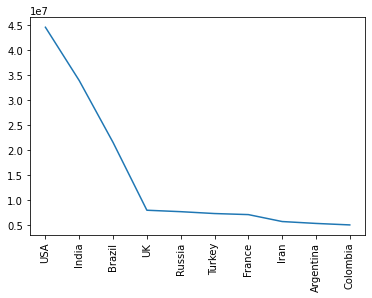

In [ ]:
# Top 10 countries affected by COVID-19 (line graph)
plt.plot(x, y1)
plt.xticks(rotation=90)
plt.show()

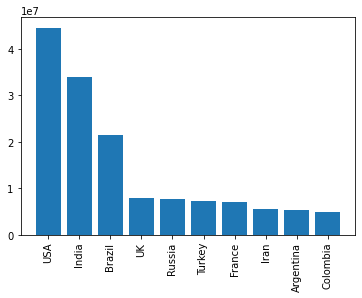

In [ ]:
# Top 10 countries affected by COVID-19 (bar graph)
plt.bar(x, y1)
plt.xticks(rotation=90)
plt.show()

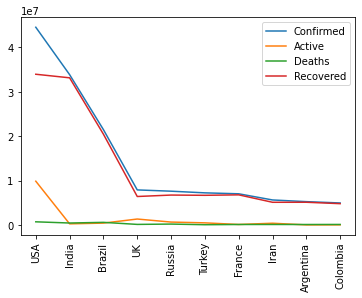

In [ ]:
# Top 10 countries affected by COVID-19 (multiline graph)
plt.plot(x, y1, label='Confirmed')
plt.plot(x, y2, label='Active')
plt.plot(x, y3, label='Deaths')
plt.plot(x, y4, label='Recovered')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

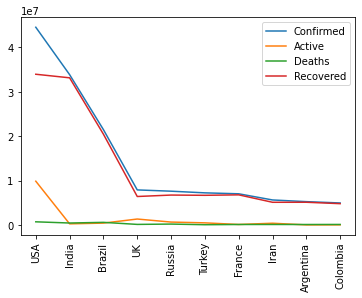

In [ ]:
# Top 10 countries affected by COVID-19 (multiline graph with grids)
labels = ['Confirmed', 'Active', 'Deaths', 'Recovered']
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.legend(labels, loc='upper right')
plt.xticks(rotation=90)
# plt.grid()
plt.show()

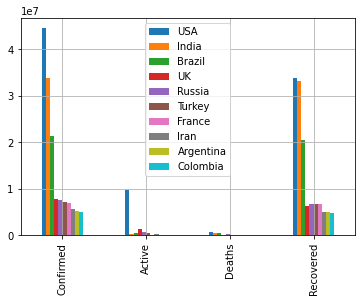

In [ ]:
# Top 10 countries’ COVID-19 statistics (multiple bar graph with grids)
df2 = pd.DataFrame([y1, y2, y3, y4])
df2.plot.bar();
plt.legend(x, loc='upper center')
plt.xticks(rotation=90)
plt.grid()
plt.show()

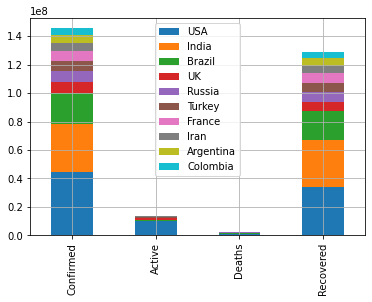

In [ ]:
# Top 10 countries’ COVID-19 statistics (vertical stacked bar graph with grids)
df2.plot.bar(stacked=True);
plt.legend(x, loc='upper center')
plt.xticks(rotation=90)
plt.grid()
plt.show()

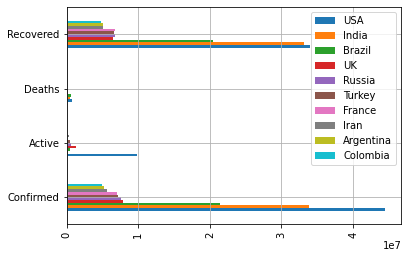

In [ ]:
# Top 10 countries’ COVID-19 statistics (horizontal graph with grid)
df2.plot.barh();
plt.legend(x, loc='upper right')
plt.xticks(rotation=90)
plt.grid()
plt.show()

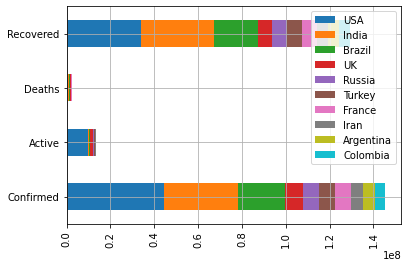

In [ ]:
# Top 10 countries’ COVID-19 statistics (horizontal stacked bar graph with grid)
df2.plot.barh(stacked=True);
plt.legend(x, loc='upper right')
plt.xticks(rotation=90)
plt.grid()
plt.show()

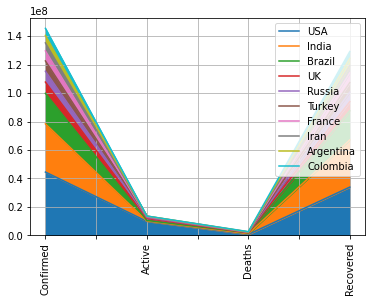

In [ ]:
# Top 10 countries’ COVID-19 statistics (overlapping area graph)
df2.plot.area();
plt.legend(x, loc='upper right')
plt.xticks(rotation=90)
plt.grid()
plt.show()

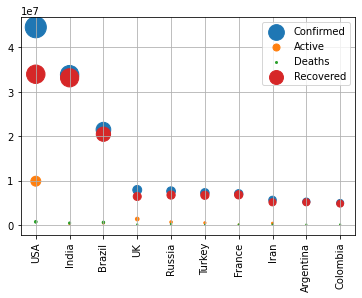

In [ ]:
# Top 10 countries’ COVID-19 statistics (scatter graph)
factor=0.00001
plt.scatter(x, y1, s=y1*factor);
plt.scatter(x, y2, s=y2*factor);
plt.scatter(x, y3, s=y3*factor);
plt.scatter(x, y4, s=y4*factor);
plt.legend(labels, loc='upper right')
plt.xticks(rotation=90)
plt.grid()
plt.show()

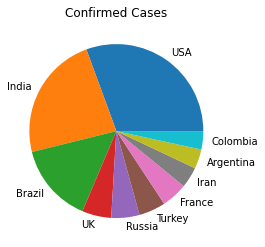

In [ ]:
# Top 10 countries’ COVID-19 statistics (pie chart)
plt.pie(y1, labels=x)
plt.title('Confirmed Cases')
plt.show()

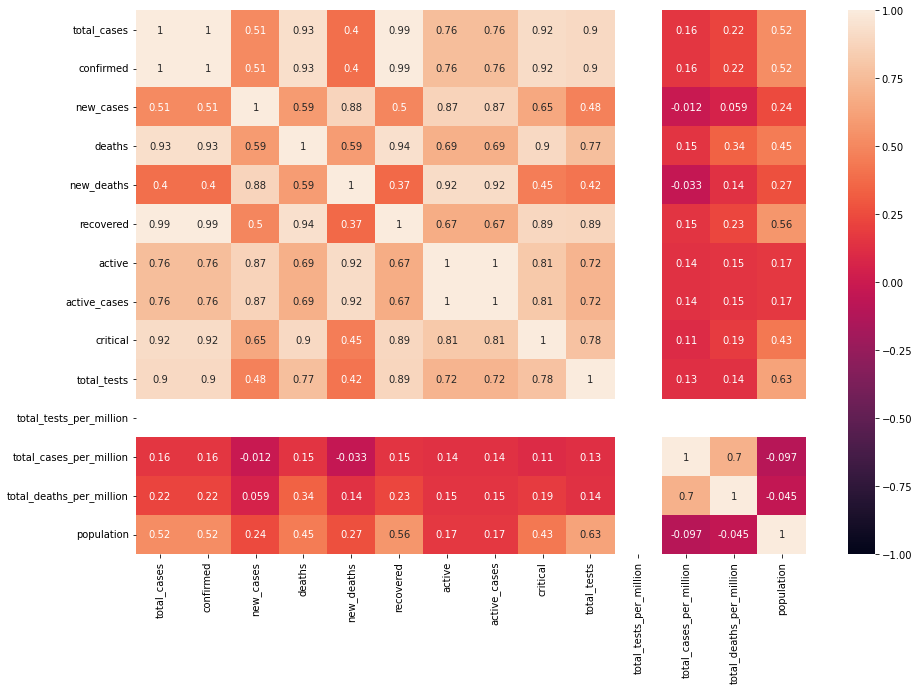

In [ ]:
# correlation matrix
import seaborn as sns
plt.subplots(figsize=(15, 10))
sns.heatmap(df_numerik.corr(), vmin=-1, vmax=1, annot=True)

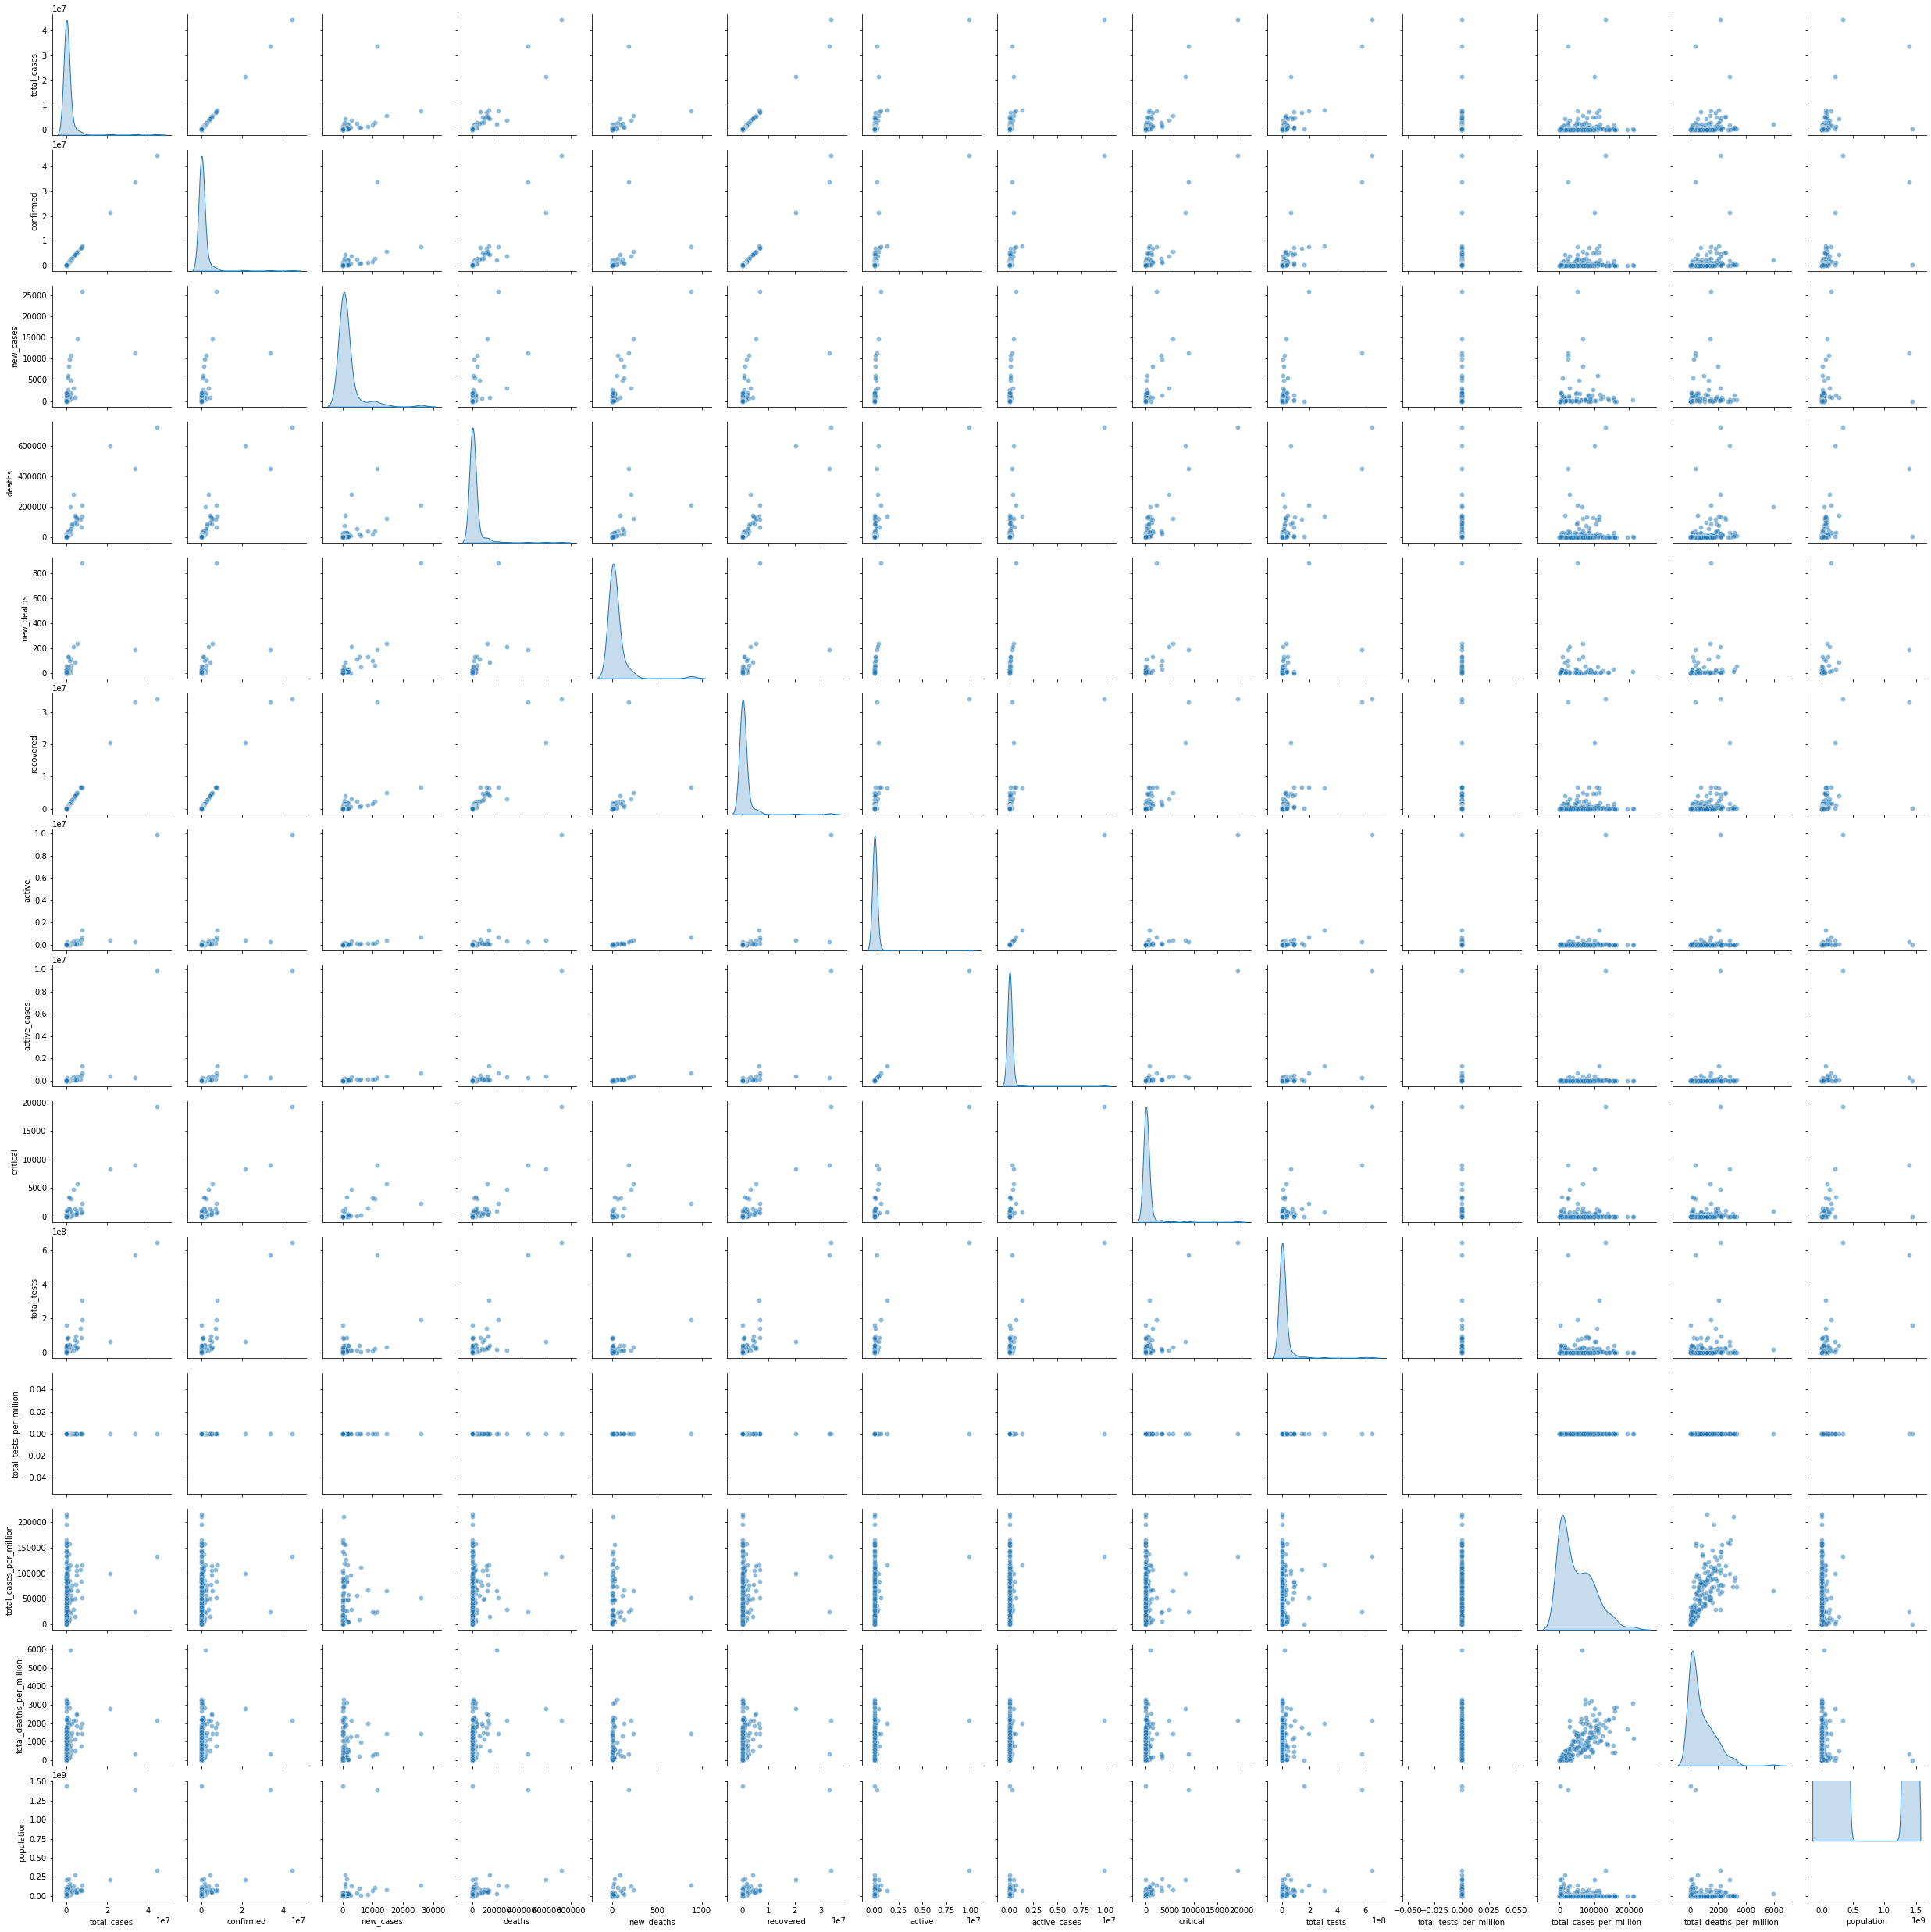

In [ ]:
# Pair Plot, source: https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(df_numerik, diag_kind='kde', plot_kws={'alpha': 0.5})

In [ ]:
# Load the data
df_clean = pd.read_csv(path + 'covid_clean.csv')
df_numerik = df_clean.drop("Country", axis=1)
df_numerik.head()

,Total Cases,Confirmed,New Cases,Deaths,New Deaths,Recovered,Active,Active Cases,Critical,Total Tests,Total Cases Per Million,Total Deaths Per Million,Population,Population (in Million)
0,44518437,44518437,0,719933,0,33938147,9860357,9860357,19236,644748656,133514,2159,333437210,333.437210
1,33845586,33845586,11343,449214,185,33134292,262080,262080,8944,574252400,24227,322,1397013045,1397.013045
2,21468121,21468121,0,597986,0,20442653,427482,427482,8318,63776166,100106,2788,214454297,214.454297
3,7900680,7900680,0,136953,0,6417660,1346067,1346067,815,304621001,115620,2004,68333332,68.333332
4,7612317,7612317,25781,210801,883,6740491,661025,661025,2300,193700000,52135,1444,146012999,146.012999


In [ ]:
sorted = df_clean.sort_values(by=['Deaths'], ascending=False)
included = sorted[~sorted.Country.isin(['Europe', 'South America', 'Asia', 'North America', 'Africa'])]
top5_deaths = included[["Country", "Deaths"]].head(5)
top5_deaths

,Country,Deaths
0,USA,719933
2,Brazil,597986
1,India,449214
14,Mexico,278801
4,Russia,210801


[Text(0.5, 1.0, 'Top 5 Deaths')]

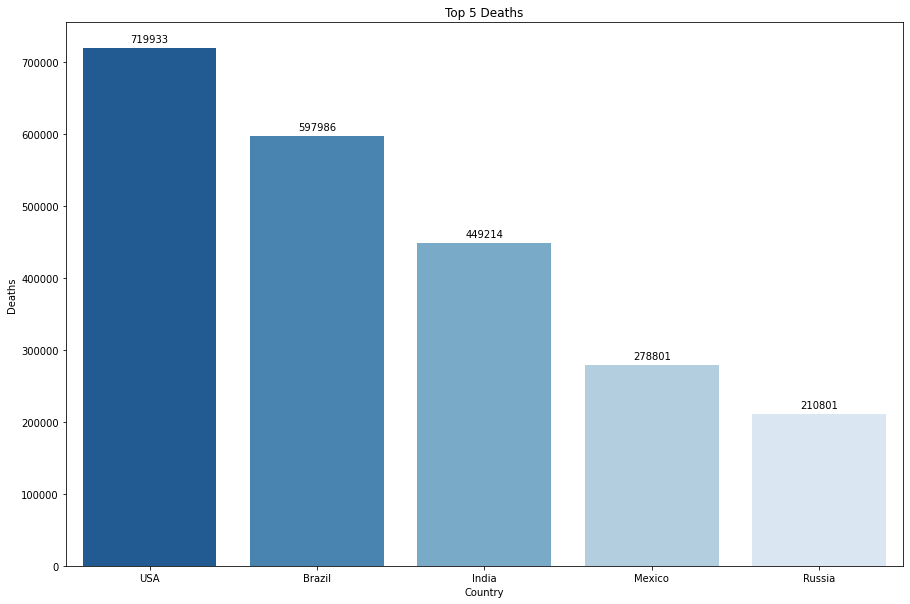

In [ ]:
# visualisasi bar chart 5 negara dengan angka kematian teratas
plt.subplots(figsize=(15, 10))
g = sns.barplot(data=top5_deaths, x="Country", y="Deaths", palette="Blues_r")

for p in g.patches: #patches utk menambahkan angka setiap bar
    g.annotate(format(p.get_height(), '.0f'), 
              (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', 
              xytext = (0, 9), 
              textcoords = 'offset points')

g.set(title='Top 5 Deaths')